In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import linalg

In [55]:
W1 = np.load('F:\\QCD\WL1_6010.npy')
W2 = np.load('F:\\QCD\WL2_6010.npy')
W3 = np.load('F:\\QCD\WL3_6010.npy')
W4 = np.load('F:\\QCD\WL4_6010.npy')

In [56]:
x = np.linspace(1,17,16)

In [57]:
yW1 = np.mean(W1,axis=0)
yW2 = np.mean(W2,axis=0)
yW3 = np.mean(W3,axis=0)
yW4 = np.mean(W4,axis=0)
yW1error = np.std(W1,axis=0)
yW2error = np.std(W2,axis=0)
yW3error = np.std(W3,axis=0)
yW4error = np.std(W4,axis=0)

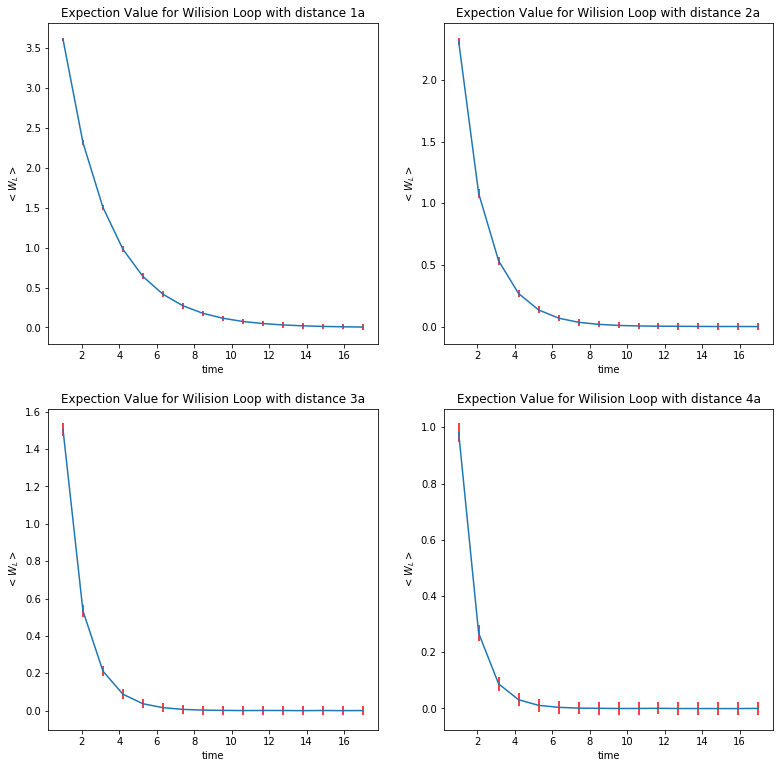

In [60]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
plt.errorbar(x,yW1,yerr=3*yW1error,ecolor='r')
plt.title('Expection Value for Wilision Loop with distance 1a')
plt.xlabel('time')
plt.ylabel('$<W_L>$')

plt.subplot(2,2,2)
plt.errorbar(x,yW2,yerr=3*yW2error,ecolor='r')
plt.title('Expection Value for Wilision Loop with distance 2a')
plt.xlabel('time')
plt.ylabel('$<W_L>$')

plt.subplot(2,2,3)
plt.errorbar(x,yW3,yerr=3*yW3error,ecolor='r')
plt.title('Expection Value for Wilision Loop with distance 3a')
plt.xlabel('time')
plt.ylabel('$<W_L>$')

plt.subplot(2,2,4)
plt.errorbar(x,yW4,yerr=3*yW4error,ecolor='r')
plt.title('Expection Value for Wilision Loop with distance 4a')
plt.xlabel('time')
plt.ylabel('$<W_L>$')

plt.savefig('F:\\QCD\WL')
plt.show()

In [22]:
x_e = np.linspace(1,16,15)

In [61]:
def Energyfit(Link):
    N = Link.shape
    Energy = np.zeros((N[0],N[1]-1))
    for k in range(N[0]):
        for j in range(N[1]-1):
            Energy[k,j] = Link[k,j]/Link[k,j+1]
    return Energy

In [65]:
Energy1 = Energyfit(W1)
E1 = np.mean(Energy1,axis=0)
error1 = np.std(Energy1,axis=0)

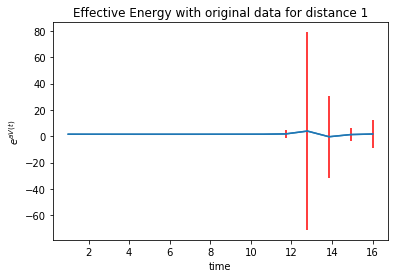

In [73]:
plt.figure()
plt.errorbar(x_e,E1,yerr=error1,ecolor='r')
plt.title('Effective Energy with original data for distance 1')
plt.xlabel('time')
plt.ylabel('$e^{aV(t)}$')
plt.plot(x_e,np.mean(Energy1,axis=0))

In [34]:
def Bs(Link,N):
    sh = Link.shape
    NewLink = np.zeros((N,sh[1]))
    for k in range(sh[1]):
        NewLink[:,k] = np.random.choice(Link[:,k],size = N, replace = True)
    return NewLink

In [38]:
newW1 = Bs(W1,500)

In [39]:
newEnergy1 = Energyfit(newW1)

In [67]:
N0 = 10000
time = 15
Energy = np.zeros((N0,time))
for N in range(10000):
    newW1 = Bs(W1,500)
    newEnergy1 = Energyfit(newW1)
    Energy[N,:] = np.mean(newEnergy1,axis=0)

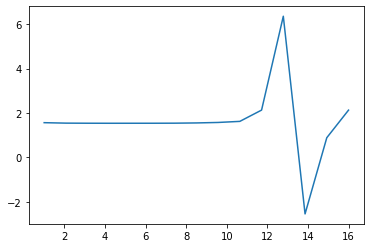

In [68]:
plt.plot(x_e,np.mean(Energy,axis=0))

<ErrorbarContainer object of 3 artists>

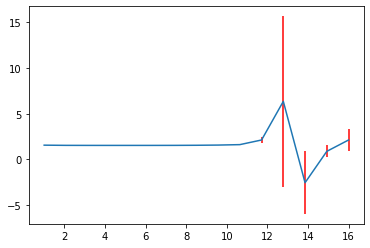

In [69]:
y = np.mean(Energy,axis=0)
error = np.std(Energy,axis=0)
plt.errorbar(x_e,y,error,ecolor='r')

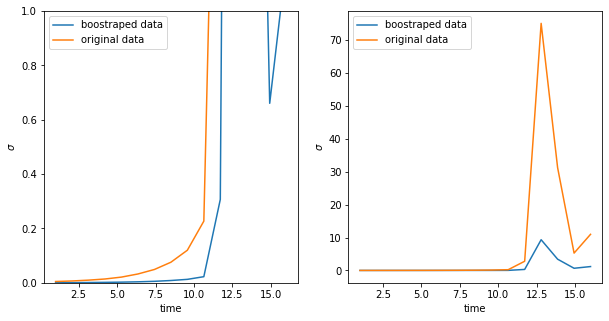

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_e,np.std(Energy,axis=0),label ='boostraped data')
plt.plot(x_e,np.std(Energy1,axis=0),label = 'original data')
plt.ylim(0,1)
plt.ylabel('$\sigma$')
plt.xlabel('time')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x_e,np.std(Energy,axis=0),label ='boostraped data')
plt.plot(x_e,np.std(Energy1,axis=0),label = 'original data')
plt.ylabel('$\sigma$')
plt.xlabel('time')
plt.legend()

plt.savefig('F:\\QCD\Boostrap')
plt.show()

In [80]:
N0 = 10000
time = 15
Energy1 = np.zeros((N0,time))
for N in range(10000):
    newW1 = Bs(W1,500)
    newEnergy1 = Energyfit(newW1)
    Energy1[N,:] = np.mean(newEnergy1,axis=0)
    print('\r',N,end='')

 9999434571329075

In [81]:
N0 = 10000
time = 15
Energy2 = np.zeros((N0,time))
for N in range(10000):
    newW2 = Bs(W2,500)
    newEnergy2 = Energyfit(newW2)
    Energy2[N,:] = np.mean(newEnergy2,axis=0)
    print('\r',N,end='')

 999915372845

In [82]:
N0 = 10000
time = 15
Energy3 = np.zeros((N0,time))
for N in range(10000):
    newW3 = Bs(W3,500)
    newEnergy3 = Energyfit(newW3)
    Energy3[N,:] = np.mean(newEnergy3,axis=0)
    print('\r',N,end='')

 999962087879

In [83]:
N0 = 10000
time = 15
Energy4 = np.zeros((N0,time))
for N in range(10000):
    newW2 = Bs(W4,500)
    newEnergy2 = Energyfit(newW2)
    Energy4[N,:] = np.mean(newEnergy2,axis=0)
    print('\r',N,end='')

 9999146684559472

In [84]:
y1 = np.mean(Energy1,axis=0)
error1 = np.std(Energy1,axis=0)
y2 = np.mean(Energy2,axis=0)
error2 = np.std(Energy2,axis=0)
y3 = np.mean(Energy3,axis=0)
error3 = np.std(Energy3,axis=0)
y4 = np.mean(Energy4,axis=0)
error4 = np.std(Energy4,axis=0)

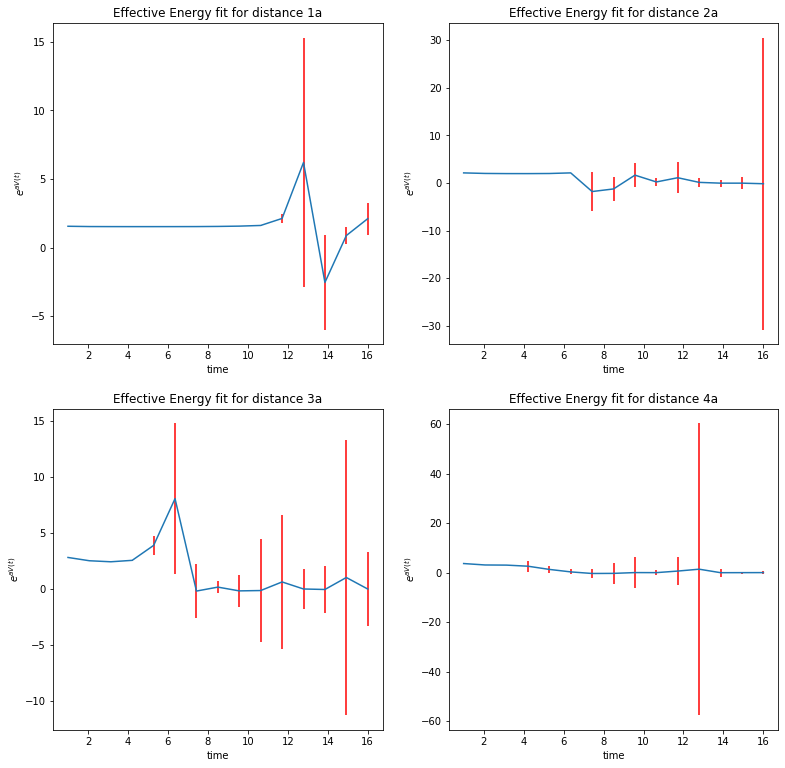

In [85]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
plt.errorbar(x_e,y1,yerr=error1,ecolor='r')
plt.title('Effective Energy fit for distance 1a')
plt.xlabel('time')
plt.ylabel('$e^{aV(t)}$')

plt.subplot(2,2,2)
plt.errorbar(x_e,y2,yerr=error2,ecolor='r')
plt.title('Effective Energy fit for distance 2a')
plt.xlabel('time')
plt.ylabel('$e^{aV(t)}$')
plt.subplot(2,2,3)
plt.errorbar(x_e,y3,yerr=error3,ecolor='r')
plt.title('Effective Energy fit for distance 3a')
plt.xlabel('time')
plt.ylabel('$e^{aV(t)}$')

plt.subplot(2,2,4)
plt.errorbar(x_e,y4,yerr=error4,ecolor='r')
plt.title('Effective Energy fit for distance 4a')
plt.xlabel('time')
plt.ylabel('$e^{aV(t)}$')

plt.savefig('F:\\QCD\Energy')
plt.show()

In [102]:
Energy = np.array([y1[2],y2[2],y3[2],y4[2]])
error = np.array([error1[2],error2[2],error3[2],error4[2]])

In [95]:
Energy

array([1.53507485, 1.99676819, 2.43809389, 3.03121822])

In [88]:
y1

array([ 1.56007216,  1.53921946,  1.53507485,  1.53345593,  1.53389541,
        1.53446607,  1.53711036,  1.54824267,  1.57000567,  1.61883095,
        2.12973419,  6.20703002, -2.53344755,  0.88352891,  2.11304145])

In [89]:
y2

array([ 2.14261622,  2.02828569,  1.99676819,  1.99347375,  2.01627817,
        2.14452947, -1.77165981, -1.22617892,  1.67017586,  0.2425795 ,
        1.12814385,  0.1526286 , -0.01129912, -0.01184124, -0.13183401])

In [90]:
y3

array([ 2.8231958 ,  2.53022316,  2.43809389,  2.5662806 ,  3.89870617,
        8.06780738, -0.17194932,  0.1793364 , -0.15681427, -0.12589819,
        0.64069562,  0.01231824, -0.03229772,  1.0366671 ,  0.00907593])

In [91]:
y4

array([ 3.66690759,  3.09035422,  3.03121822,  2.59370866,  1.30051596,
        0.29477856, -0.34772937, -0.30547477,  0.01634062, -0.00535933,
        0.63078739,  1.38653216, -0.02749798, -0.00797127,  0.01000626])

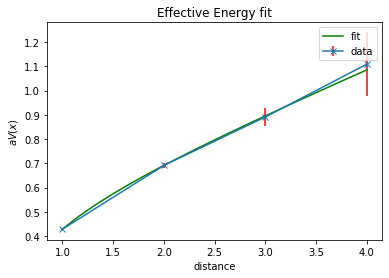

In [132]:
plt.errorbar([1,2,3,4],np.log(Energy),yerr=3*error,ecolor='r',marker = 'x',label = 'data')
plt.plot(x,y,label = 'fit',color = 'g')
plt.title('Effective Energy fit')
plt.xlabel('distance')
plt.ylabel('${aV(x)}$')
plt.legend()
plt.savefig('F:\\QCD\enfit')
plt.show()

In [111]:
def func(x,a,b,c):
    return a/x+b+c*x

In [112]:
popt, pcov = curve_fit(func,[1,2,3,4], np.log(Energy),sigma =error)

In [113]:
popt

array([-0.17542078,  0.42904469,  0.17495848])

In [114]:
pcov

array([[ 0.00059722, -0.00085952,  0.00026358],
       [-0.00085952,  0.00124279, -0.0003843 ],
       [ 0.00026358, -0.0003843 ,  0.00012092]])

In [115]:
np.sqrt(pcov)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.02443818,        nan, 0.016235  ],
       [       nan, 0.03525328,        nan],
       [0.016235  ,        nan, 0.01099658]])

In [116]:
def func1(x):
    return -0.17/x+0.42+0.17*x

In [123]:
x = np.linspace(1,4,20)
y = -0.175/x+0.429+0.175*x